## 比较，掩码和布尔逻辑

### 示例：计算下雨天数

In [1]:
import numpy as np
import pandas as pd
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
print(rainfall)
inches = rainfall / 254.0
print(inches.shape)

[  0  41  15   0   0   3 122  97  58  43 213  15   0   0   0   0   0   0
   0   0   0   5   0   0   0   0   0  89 216   0  23  20   0   0   0   0
   0   0  51   5 183 170  46  18  94 117 264 145 152  10  30  28  25  61
 130   3   0   0   0   5 191 107 165 467  30   0 323  43 188   0   0   5
  69  81 277   3   0   5   0   0   0   0   0  41  36   3 221 140   0   0
   0   0  25   0  46   0   0  46   0   0   0   0   0   0   5 109 185   0
 137   0  51 142  89 124   0  33  69   0   0   0   0   0 333 160  51   0
   0 137  20   5   0   0   0   0   0   0   0   0   0   0   0   0  38   0
  56   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  18  64   0   5  36  13   0   8   3   0   0   0   0   0   0  18  23   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   3 193   0   0   0   0   0   0   0   0   0   5   0   0
   0   0   0   0   0   0   5 127 216   0  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  84  13   0  30   0   

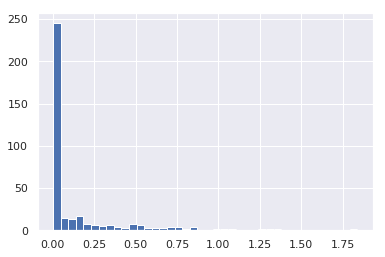

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn 
seaborn.set()
plt.hist(inches, 40)
plt.show()

### digging into the data


In [3]:
## 掩码：比较运算

In [4]:
import numpy as np
x = np.array([1,2,3,4,5])
x>3

array([False, False, False,  True,  True])

In [5]:
(2 * x) == (x ** 2)


array([False,  True, False, False, False])

In [6]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))

In [7]:
x< 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## 操作布尔数组

### 统计数据

In [8]:
np.count_nonzero(x<6)

8

In [9]:
np.sum(x<6, axis=1)

array([4, 2, 2])

In [10]:
# 是否有一个大于8的
np.any(x>8)

True

In [11]:
# 是否全部等于6
np.all(x == 6)

False

In [12]:
# any 和 all可以指定特点轴
np.all(x<8, axis=1)

array([ True, False,  True])

## 布尔操作

| Operator	    | Equivalent ufunc    | Operator	    | Equivalent ufunc    |
|---------------|---------------------|---------------|---------------------|
|``&``          |``np.bitwise_and``   |&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   |``~``          |``np.bitwise_not``   |

>**note:** and or not 与 & | ～ 的区别在与，and or not 是**判断整个对象**， 而掩码操作的利用比特进行的

In [17]:
np.sum((inches > 0.5) & (inches < 1))

29

In [20]:
np.sum(~((inches<=0.5) | (inches>=1)))

29

In [22]:
print("Number days without rain:      ",np.sum(inches==0))
print("Number days with rain:         ",np.sum(inches>0))
print("Days with more than 0.5 inches:",np.sum(inches>0.5))
print("Rainy days with < 0.2 inches  :",np.sum((inches<0.2)&(inches>0)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## Boolean Arrays as Masks

In [23]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [24]:
x<5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [25]:
# select these values from the array which x<5
x[x<5]

array([0, 3, 3, 3, 2, 4])

In [32]:
# compute some relevant statistics on the Seattle rain data

rainy = (inches>0)
days = np.arange(365)
summer = (days>172) & (days<262)
print("Median precip on rainy days in 2014 (inches):   ",
     np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
     np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non`-summer rainy days (inches):",
      np.median(inches[(rainy & ~summer)]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non`-summer rainy days (inches): 0.20078740157480315


In [39]:
a = np.array([1,2,3,0],dtype=bool)
b = np.array([0,1,2,0],dtype=bool)
print(a&b)
# print(a and b) 报错

[False  True  True False]
